### Import

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
fpt = pd.read_csv("../data/FPT.csv")
msn = pd.read_csv("../data/MSN.csv")
pnj = pd.read_csv("../data/PNJ.csv")
vic = pd.read_csv("../data/VIC.csv")

### FPT

In [12]:
fpt.head()

,Ticker,Date/Time,Open,High,Low,Close,Volume,Open Interest
0,FPT,2018-12-25 09:15:00,30.89,30.89,30.89,30.89,35410,0
1,FPT,2018-12-25 09:16:00,30.81,30.81,30.81,30.81,190,0
2,FPT,2018-12-25 09:17:00,30.74,30.81,30.74,30.74,1120,0
3,FPT,2018-12-25 09:18:00,30.74,30.74,30.74,30.74,2120,0
4,FPT,2018-12-25 09:19:00,30.74,30.74,30.74,30.74,22500,0


In [10]:
fpt.tail()

,Ticker,Date/Time,Open,High,Low,Close,Volume,Open Interest
97401,FPT,2020-12-22 14:24:00,58.2,58.2,58.2,58.2,27470,0
97402,FPT,2020-12-22 14:25:00,58.2,58.2,58.2,58.2,14820,0
97403,FPT,2020-12-22 14:26:00,58.2,58.2,58.2,58.2,500,0
97404,FPT,2020-12-22 14:29:00,58.1,58.1,58.1,58.1,2500,0
97405,FPT,2020-12-22 14:46:00,58.1,58.1,58.1,58.1,11170,0


In [4]:
fpt.isnull().sum()

Ticker           0
Date/Time        0
Open             0
High             0
Low              0
Close            0
Volume           0
Open Interest    0
dtype: int64

In [6]:
fpt.describe()

,Open,High,Low,Close,Volume,Open Interest
count,97406.000000,97406.000000,97406.000000,97406.000000,9.740600e+04,97406.0
mean,45.071630,45.090138,45.051430,45.071631,8.044173e+03,0.0
std,6.359803,6.364950,6.354245,6.359799,1.753203e+04,0.0
min,30.250000,30.250000,30.220000,30.250000,1.000000e+01,0.0
25%,39.740000,39.740000,39.700000,39.740000,7.500000e+02,0.0
50%,46.950000,46.950000,46.950000,46.950000,2.960000e+03,0.0
75%,49.200000,49.250000,49.170000,49.200000,8.960000e+03,0.0
max,58.400000,58.500000,58.400000,58.400000,1.255930e+06,0.0


In [8]:
fpt["Date/Time"] = pd.to_datetime(fpt["Date/Time"])

In [9]:
fpt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97406 entries, 0 to 97405
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Ticker         97406 non-null  object        
 1   Date/Time      97406 non-null  datetime64[ns]
 2   Open           97406 non-null  float64       
 3   High           97406 non-null  float64       
 4   Low            97406 non-null  float64       
 5   Close          97406 non-null  float64       
 6   Volume         97406 non-null  int64         
 7   Open Interest  97406 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(2), object(1)
memory usage: 5.9+ MB


In [13]:
fpt["Price Change"] = fpt["Close"].shift(-1) - fpt["Close"]

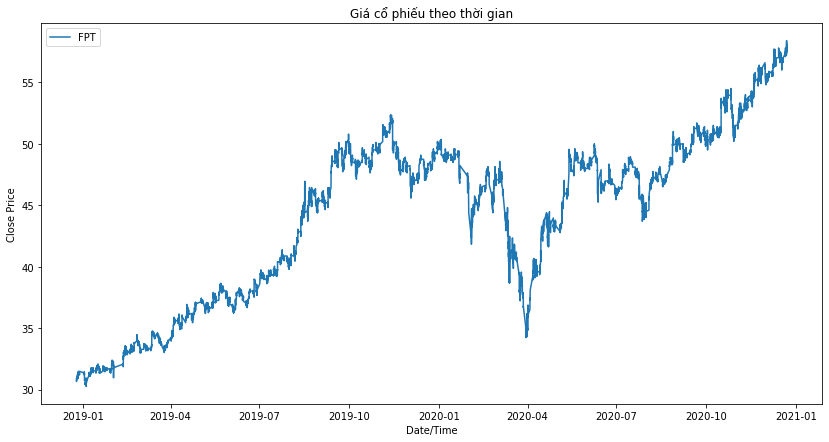

In [15]:
plt.figure(figsize=(14, 7))
plt.plot(fpt['Date/Time'], fpt['Close'], label='FPT')
plt.xlabel('Date/Time')
plt.ylabel('Close Price')
plt.title('Giá cổ phiếu theo thời gian')
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(14, 7))
sns.histplot(vic['Close'], kde=True, label='VIC')
sns.histplot(fpt['Close'], kde=True, label='FPT')
sns.histplot(msn['Close'], kde=True, label='MSN')
sns.histplot(pnj['Close'], kde=True, label='PNJ')
plt.xlabel('Close Price')
plt.ylabel('Frequency')
plt.title('Phân phối giá cổ phiếu')
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(12, 6))
sns.heatmap(fpt.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Ma trận tương quan cho FPT')
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
for df in [vic, fpt, msn, pnj]:
    df['Volume'] = scaler.fit_transform(df[['Volume']])